In [1]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 讀取圖檔
img = cv2.imread('lena.bmp')

In [3]:
def GetSaltAndPepper_Image(original_image, threshold = 0.05):
    result = original_image.copy()
    for r in range(original_image.shape[0]):
        for c in range(original_image.shape[1]):
            rv = np.random.uniform(0,1)
            if(rv <= threshold):
                result[r,c,:] = 0
            elif(rv > 1 - threshold):
                result[r,c,:] = 255
            else:
                pass
    return result

In [4]:
def SNR(ori_img, noi_img):
    tmp1 = ori_img[:,:,0]/255
    tmp2 = noi_img[:,:,0]/255
    mu = np.sum(tmp1)/(512*512)
    vs = np.sum((tmp1-mu)**2)/(512*512)
    mu_noi = np.sum(tmp2 - tmp1)/(512*512)
    vn = np.sum((tmp2-tmp1-mu_noi)**2)/(512*512)
    return 20*np.log10(np.sqrt(vs/vn))

0.8770695653694499


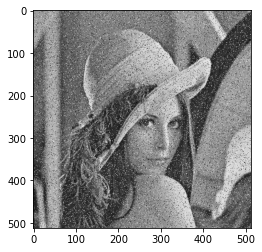

In [5]:
img_SAP005 = GetSaltAndPepper_Image(img, 0.05)
print(SNR(img, img_SAP005))
plt.imshow(img_SAP005.astype('uint8'))
plt.show()

In [6]:
def box_filter(ori_img, s):
    div = s * s
    bf_result = ori_img.copy()
    h = s//2
    for r in range(h,ori_img.shape[0] - h):
        for c in range(h,ori_img.shape[1] - h):
            #print(ori_img[r-h:r+h+1, c-h:c+h+1, 0].shape)
            bf_result[r, c, :] = np.sum(ori_img[r-h:r+h+1, c-h:c+h+1, 0])/div 
    return bf_result

In [12]:
def mid_filter(ori_img, s):
    div = s * s
    mf_result = ori_img.copy()
    h = s//2
    for r in range(h,ori_img.shape[0] - h):
        for c in range(h,ori_img.shape[1] - h):
            mf_result[r, c, :] = np.sort(ori_img[r-h:r+h+1, c-h:c+h+1, 0].reshape(div))[div//2]
    return mf_result

9.179153162795965


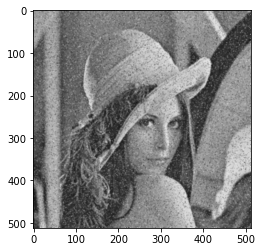

In [8]:
bf33 = box_filter(img_SAP005, 3)
print(SNR(img, bf33))
plt.imshow(bf33.astype('uint8'))
plt.show()

10.511067607204474


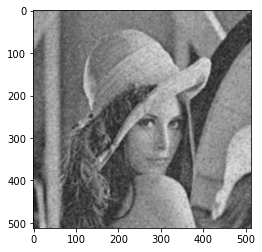

In [9]:
bf35 = box_filter(img_SAP005, 5)
print(SNR(img, bf35))
plt.imshow(bf35.astype('uint8'))
plt.show()

17.29320728658043


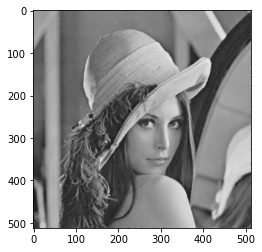

In [10]:
mf33 = mid_filter(img_SAP005, 3)
print(SNR(img, mf33))
plt.imshow(mf33.astype('uint8'))
plt.show()

14.527493086697179


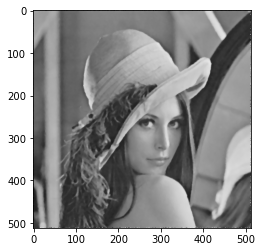

In [13]:
mf35 = mid_filter(img_SAP005, 5)
print(SNR(img, mf35))
plt.imshow(mf35.astype('uint8'))
plt.show()

In [16]:
def dilation(img,k): 
    img_pad = np.pad(array=img, pad_width=((3,3),(3,3),(0,0)), mode='constant', constant_values=0)
    img_tmp = np.zeros(img_pad.shape)
    for i in range(3,515): #3~514
        for j in range(3,515): #3~514
            a1 = max(img_pad[i-2,j-1:j+3,0])
            a2 = max(img_pad[i-1,j-2:j+3,0])
            a3 = max(img_pad[i,j-2:j+3,0])
            a4 = max(img_pad[i+1,j-2:j+3,0])
            a5 = max(img_pad[i+2,j-1:j+3,0])
            f  = max(img_pad[i,j:,0])
            f = 0
            img_tmp[i,j,0] = max(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,1] = max(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,2] = max(a1,a2,a3,a4,a5,f)
    return img_tmp[3:515,3:515]
def erosion(img,k): 
    img_pad = np.pad(array=img, pad_width=((3,3),(3,3),(0,0)), mode='constant', constant_values=255)
    img_tmp = np.zeros(img_pad.shape)
    for i in range(3,515): #3~514
        for j in range(3,515): #3~514
            a1 = min(img_pad[i-2,j-1:j+3,0])
            a2 = min(img_pad[i-1,j-2:j+3,0])
            a3 = min(img_pad[i,j-2:j+3,0])
            a4 = min(img_pad[i+1,j-2:j+3,0])
            a5 = min(img_pad[i+2,j-1:j+3,0])
            f  = min(img_pad[i,j:,0])
            f = 255
            img_tmp[i,j,0] = min(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,1] = min(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,2] = min(a1,a2,a3,a4,a5,f)
    return img_tmp[3:515,3:515]
def opening(img,k):
    return dilation(erosion(img,k),k)
def closing(img,k):
    return erosion(dilation(img,k),k)

In [17]:
kernel = np.array([[0,255,255,255,0],[255,255,255,255,255],[255,255,255,255,255],[255,255,255,255,255],[0,255,255,255,0]])

4.291645311232938


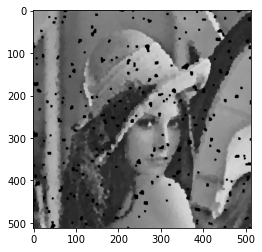

In [18]:
img_oc = closing(opening(img_SAP005,kernel),kernel)
print(SNR(img, img_oc))
plt.imshow(img_oc.astype('uint8'))
plt.show()

3.707643683922531


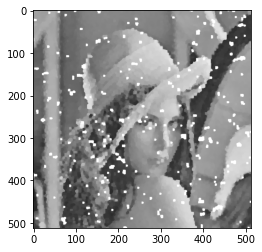

In [19]:
img_co = opening(closing(img_SAP005,kernel),kernel)
print(SNR(img, img_co))
plt.imshow(img_co.astype('uint8'))
plt.show()